1.Marital Status VS Stroke: How does marital status relate to the occurrence of strokes?
2.Work Type VS Stroke: Which work type has a higher prevalence of strokes?


In [3]:
import pandas as pd
import numpy as np
import csv
import os
from pathlib import Path
import matplotlib.pyplot as plt

In [4]:
# File to Load 
stroke_data_to_load = Path("../Resources/healthcare-dataset-stroke-data-cleaned.csv")

In [5]:
# Read Data File and store into Pandas DataFrames
stroke_data = pd.read_csv(stroke_data_to_load)
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,31.735817,never smoked,1
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,1,Private,Urban,83.75,33.905702,never smoked,0
5106,44873,Female,81.0,0,0,1,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,1,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,1,Private,Rural,166.29,25.600000,formerly smoked,0


# 1.Marital status vs Stroke

In [6]:
stroke_df = pd.DataFrame(stroke_data)
stroke_df

# Clean the gender column by stripping leading/trailing whitespaces
stroke_df['gender'] = stroke_df['gender'].str.strip()

# Count the number of males
male_count = (stroke_df['gender'].str.lower() == 'male').sum()

# Count the number of females
female_count = (stroke_df['gender'].str.lower() == 'female').sum()

# Print the counts
print("Male count:", male_count)
print("Female count:", female_count)

# Filter rows for males and calculate total stroke count
male_stroke_total = stroke_df[stroke_df['gender'].str.lower() == 'male']['stroke'].sum()

# Filter rows for females and calculate total stroke count
female_stroke_total = stroke_df[stroke_df['gender'].str.lower() == 'female']['stroke'].sum()

# Print the results
print("Total stroke count for males:", male_stroke_total)
print("Total stroke count for females:", female_stroke_total)

# Filter rows for males and calculate total married count
male_married_count = stroke_df[(stroke_df['gender'].str.lower() == 'male') & (stroke_df['ever_married'] == 1)].shape[0]

# Filter rows for females and calculate total married count
female_married_count = stroke_df[(stroke_df['gender'].str.lower() == 'female') & (stroke_df['ever_married'] == 1)].shape[0]

# Print the results
print("Total married count for males:", male_married_count)
print("Total married count for females:", female_married_count)

# Filter rows for males and calculate total not married count
male_not_married_count = stroke_df[(stroke_df['gender'].str.lower() == 'male') & (stroke_df['ever_married'] == 0)].shape[0]

# Filter rows for females and calculate total not married count
female_not_married_count = stroke_df[(stroke_df['gender'].str.lower() == 'female') & (stroke_df['ever_married'] == 0)].shape[0]

# Print the results
print("Total not married count for males:", male_not_married_count)
print("Total not married count for females:", female_not_married_count) 

Male count: 2115
Female count: 2994
Total stroke count for males: 108
Total stroke count for females: 141
Total married count for males: 1352
Total married count for females: 2001
Total not married count for males: 763
Total not married count for females: 993


In [7]:
# Create a dictionary with the data
stroke_dataframe = {
    'gender': ['male', 'female'],
    'total_stroke': [male_stroke_total, female_stroke_total],
    'ever_married': [male_married_count, female_married_count],
    'not_married': [male_not_married_count, female_not_married_count]
}

# Create the DataFrame
df = pd.DataFrame(stroke_dataframe)

# Print the DataFrame
print(df)

   gender  total_stroke  ever_married  not_married
0    male           108          1352          763
1  female           141          2001          993


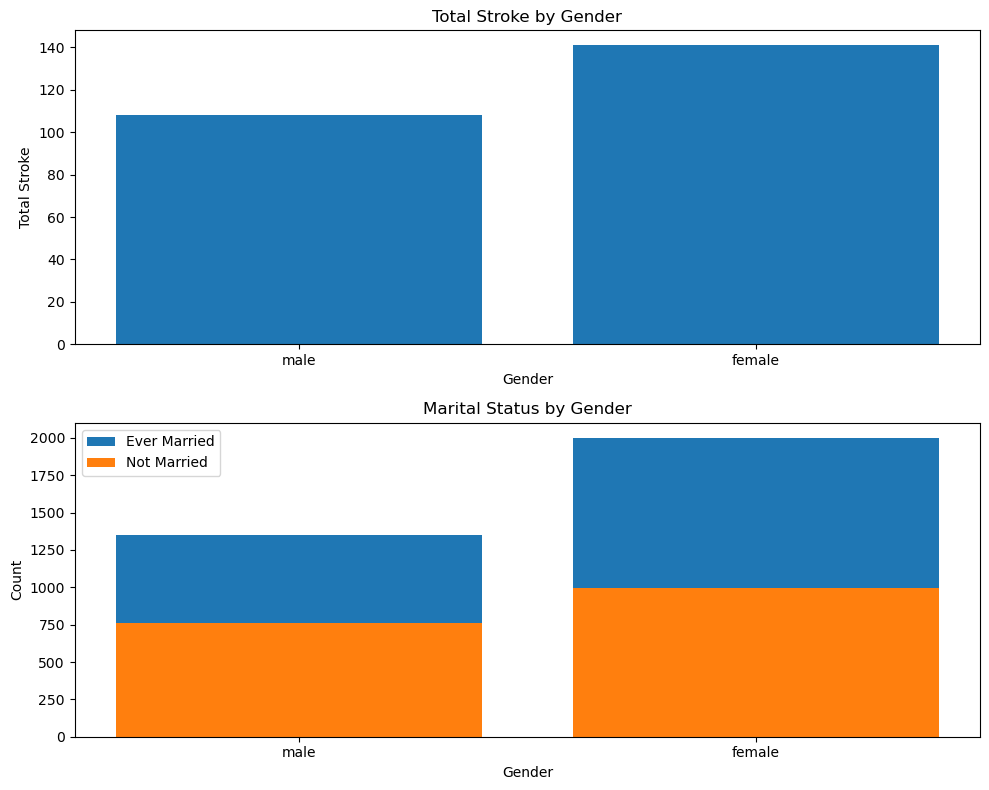

In [8]:

# Set the figure size and layout
plt.figure(figsize=(10, 8))
plt.subplots_adjust(hspace=0.4)

# Plotting the bar chart for stroke
plt.subplot(2, 1, 1)  # Creating the first subplot
plt.bar(df['gender'], df['total_stroke'])
plt.xlabel('Gender')
plt.ylabel('Total Stroke')
plt.title('Total Stroke by Gender')

# Plotting the bar chart for ever_married and not_married
plt.subplot(2, 1, 2)  # Creating the second subplot
plt.bar(df['gender'], df['ever_married'], label='Ever Married')
plt.bar(df['gender'], df['not_married'], label='Not Married')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Marital Status by Gender')
plt.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

Analysis :-Female are likely to have more Heart stroke compared to Male
          -Married and unmarried ratio for Female is almost the equal
          -Unmarried Male is likely to have more Heart stroke compared to Married Male

# 2.Work type vs Stroke

In [9]:
# Calculate the total number of employees in each job type category
govt_job_count = (stroke_data['work_type'] == 'Govt_job').sum()
self_employed_count = (stroke_data['work_type'] == 'Self-employed').sum()
private_count = (stroke_data['work_type'] == 'Private').sum()

# Print the results
print("Total number of employees in Government Job:", govt_job_count)
print("Total number of employees who are Self-employed:", self_employed_count)
print("Total number of employees in Private sector:", private_count)

Total number of employees in Government Job: 657
Total number of employees who are Self-employed: 819
Total number of employees in Private sector: 2925


In [10]:
# Create a dictionary with the data
dataframe2 = {
    'job_type': ['Government Job', 'Self-employed', 'Private'],
    'count': [govt_job_count, self_employed_count, private_count]
}

# Create the DataFrame
df = pd.DataFrame(dataframe2)

# Print the DataFrame
print(df)

         job_type  count
0  Government Job    657
1   Self-employed    819
2         Private   2925


In [25]:
# Calculate the counts for each job type and stroke category
govt_jobs_stroke_count = stroke_data[stroke_data['work_type'] == 'Govt_job']['stroke'].value_counts()
private_jobs_stroke_count = stroke_data[stroke_data['work_type'] == 'Private']['stroke'].value_counts()
self_employed_stroke_count = stroke_data[stroke_data['work_type'] == 'Self-employed']['stroke'].value_counts()

# Create a DataFrame to display the results
result_df = pd.DataFrame({
    'Stroke': ['No', 'Yes'],
    'Government Jobs': govt_jobs_stroke_count.values,
    'Private Jobs': private_jobs_stroke_count.values,
    'Self-employed': self_employed_stroke_count.values
})

# Set the 'Stroke' column as the index
result_df = result_df.set_index('Stroke')

# Print the results
print(result_df)

        Government Jobs  Private Jobs  Self-employed
Stroke                                              
No                  624          2776            754
Yes                  33           149             65


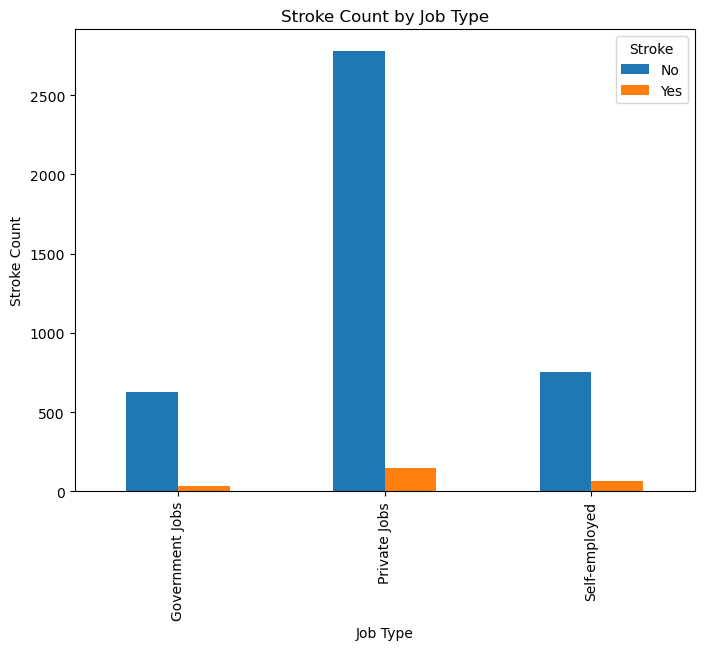

In [26]:
# Transpose the DataFrame
result_df_transposed = result_df.transpose()

# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Plot the bar chart
result_df_transposed.plot(kind='bar', ax=plt.gca())
plt.xlabel('Job Type')
plt.ylabel('Stroke Count')
plt.title('Stroke Count by Job Type')

# Show the plot
plt.show()

Analysis:-From the above analysis,it is clear that people working in Private companies are having more Heart stroke compared to Government jobs and the people,who are self-employed